# Optimization of Convolution Neural Network

## Regularization of Network Training

### General about the optimization task

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
    One of the most common problem in data science is to avoid <b>overfitting</b>.<ul>
  <u>  In the case of overfitting the Neural network model has a very high variance or bias and it cannot generalize well to data it has not been trained on.</u></ul>
The other problems are the gradient explosion and vanishing - <u> The problem of gradient stopping</u> this problem can lead to under-fitting.<br>    
    There are several common ways to overcame the the model training problems:<ul>
    <li><b>Model regularization</b> <ul>
   In this case regularization can be defined as model modification that is intended to reduce its generalization error but almost rest the same its training error. <br>
Among the all regularization methods we can distinguish:<ul>
    <li> Loss function and gradient regularization (such as L1, L2).
    <li> Weight regularization (dropout, weight gradient constrain, end e.t.c. - work like L0 regularization).
    <li> Data normalization (batchnorm, layer norm and e.t.c.).
    <li> Learning optimization.        
        <ul>
           <li> Cross-validation, hyperparameters optimization, 
           <li> Choosing of the optimizer (ADAM, RMS, SGD with moment) 
           <li> learning rate scheduler (strategy of its change). 
        <li> Model initialization (weight initialization, or weights pretraining). 
      </ul>   </ul>
 <li> <b>Architecture-Specific optimization</b> (auxiliary output (inception), several sub-layers in parallel, skip connection layers, channel shuffle, attention layers end e.t.c.).
        <ul> Also here can be added specific convolutions, replacing of flatten to global average pooling, replacing pooling upsampling with transposed convolution or high res conv and e.t.c.</ul> 

 <li><b> Dataset optimization:</b><ul>        <li> Increasing the dataset or augment it.
<li> Data clearing and denoising (exclude corrupted or misclassified data, look at the anomalies, check that all classes have the same complexity of classification or look for a imbalanced classification).</ul>
<li> <b>Model search (Architecture or it hyperparameters)</b>. 
    <ul> Or models Ensembling.</ul>    
   

<!--   https://www.analyticsvidhya.com/blog/2018/04/fundamentals-deep-learning-regularization-techniques/#:~:text=If%20you've%20built%20a,the%20unseen%20data%20as%20well.   -->
<!--     https://towardsdatascience.com/how-to-improve-a-neural-network-with-regularization-8a18ecda9fe3 -->
<!--     https://towardsdatascience.com/regularization-techniques-for-neural-networks-e55f295f2866 -->
<!--     https://amaarora.github.io/2021/03/13/optimizers.html -->



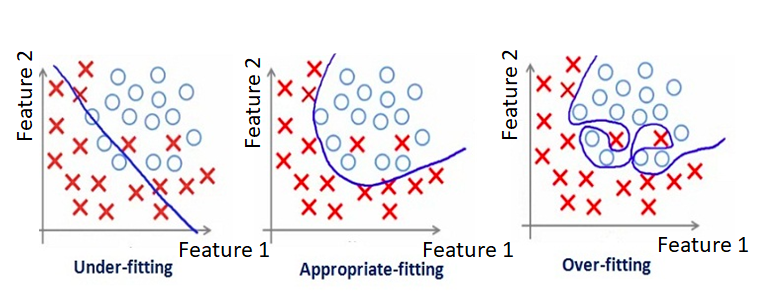

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
<blockquote>
    Actually overfitting problem is connected with so-called <b>Ill-conditioned problem </b>.<ul>
   <li> <b>Ill-conditioned problem</b>  – the small perturbation (changing) in the input data cause the relatively high perturbation (changing) of the estimation results.<br>
   <li> The problem of Ill-conditions can implicitly appears in the outliers (in comparison with outlier value even normal conditions can be seems to be small).<br>
    <li> For all independent data in amount enough ($\ge 2d+1$, where $d$ is the number of features) we will not have ill-condition.
     <li> for data with some relation (with dependence) - then higher correlation between data, then worse condition and more influence of perturbation on the result - due to relation between data).
     <li> then higher noise influence, then also worse condition.  
     <li> then more data we have then better condition.
    <li><u>Ill-conditioned problem is connected with the concept of the <b>condition number</b></u>.<UL> 
    <blockquote>
    <li> Let's assume, that we have the model in form
 $$y_{1\times M} =f(W_{1\times N} X_{N\times M}) $$
Let input matrix $x$ be perturbed with relatively small random $\Delta X$ which lead to the new state $y + \Delta y$ such as
$$y + \Delta y=f(W^*\cdot (X+\Delta X))$$
where $W^*$ would be the new solution of optimization problem.
For small $\Delta X$ - small change in the input we want  $\Delta W=W^*-W$ to be sufficiently small:
$$\frac{||\Delta W||}{||W+\Delta W||} \leq \frac{k(X)}{1-k(X) \frac {||\Delta X||}{||X||}} (\frac{||\Delta X||}{||X||} +\frac{||f^{-1}(\Delta y)||}{f^{-1}(||y||)} \to \min$$
where $k$ is the condition number; and $f^{-1}$ is the inverse function for $f$.<br>
Thus then less cond number $k$ then better (the more conditioned our solution).
</ul>
In supervised learning  it means that when you tried to make prediction on unsupervised data which are slightly different from  training data set than  the error would become unexpectedly high.


### About Augmentation

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
Toward the data augumentation<ul>
<li>Affine transformations<ul>
    <li>Rotation
    <li>Scaling
    <li>Random cropping
    <li>Reflection</ul>
<li>Elastic transformations<ul>
    <li>Contrast shift
    <li>Brightness shift
    <li>Blurring
    <li>Channel shuffle</ul>
<li>Advanced transformations<ul>
    <li>Random erasing
    <li>Adding rain effects, sun flare...
    <li>Image blending</ul>
<li>Neural-based transformations<ul>
    <li>Adversarial noise
    <li>Neural Style Transfer
    <li>Generative Adversarial Networks</ul>

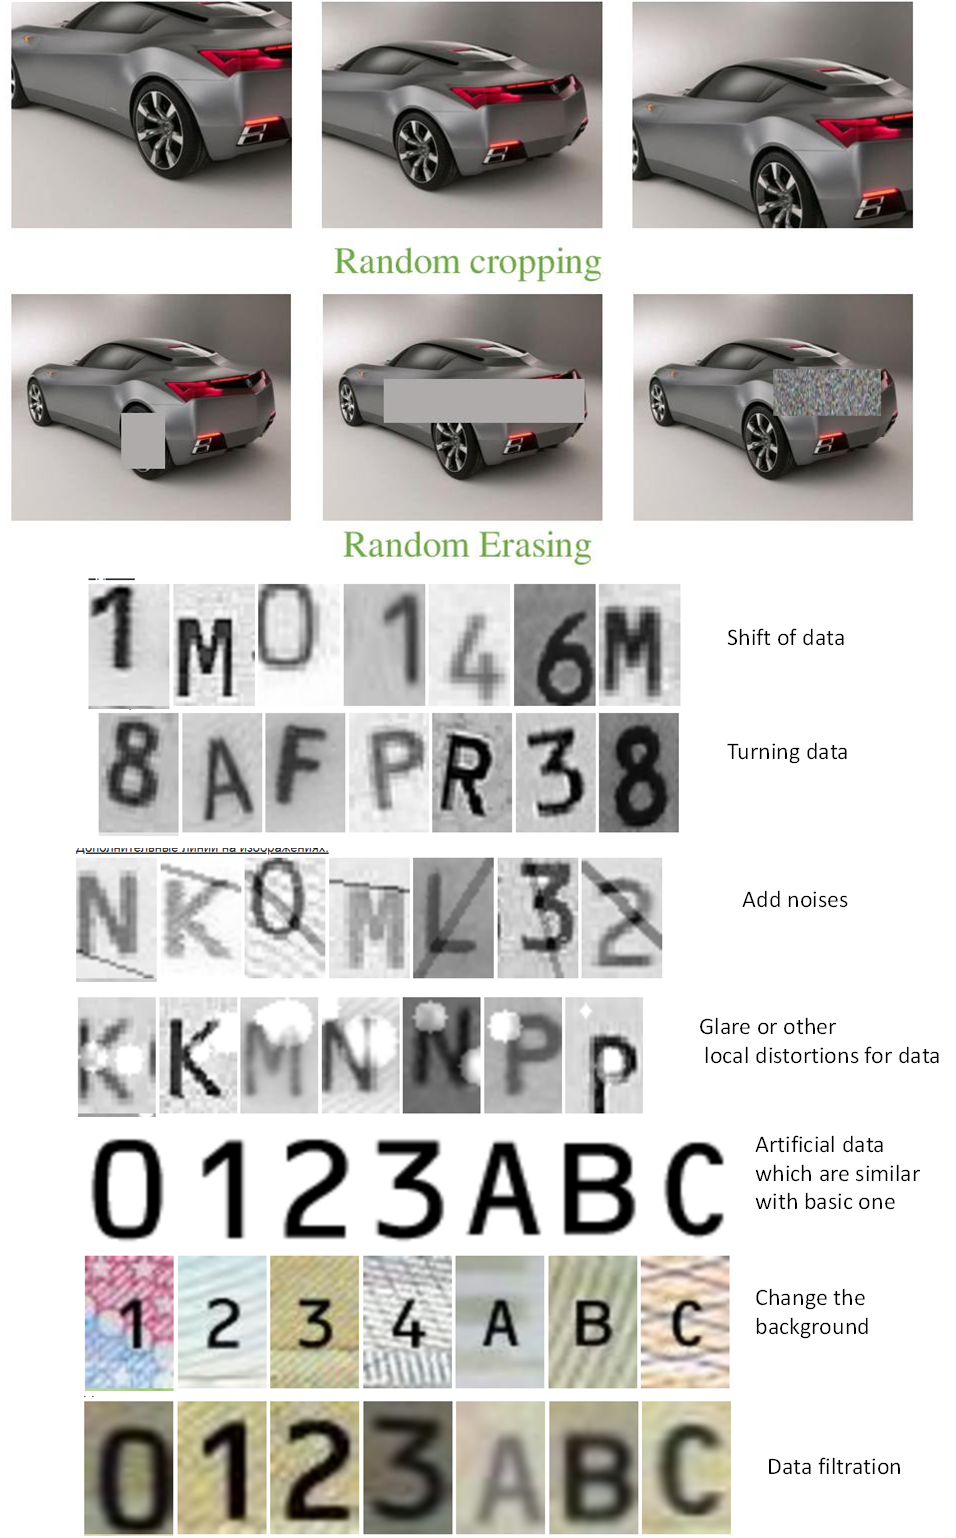

### Loss Function Regularization in Model Training

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
    The most simple way to overcome the overfitting problem is to use regularization techniques.
    <b>The meaning of the techniques is to impose constraints on the loss function and weights up-dates or its influence</b>.
For one layer netwrok in the form $y=f(WX)$ with loss function $L$ we can write the task as:
    $$ \begin{cases} L\left(y,f(WX)\right)\to \min \\ \|W\|\leq \text{const}\end{cases}, $$
   where:<ul>
    <li> $\|W\|$ is the weight norm (calculated by arbitrary chosen algorithm, e.g. L2, L1 or elastic).
     <li> $\text{const}$ is the some constrain, imposed on the weight update.
         </ul>
     Using Calculus of variations the task can be reduces to the following form:
     $$ L(y,f(WX)) + \lambda \|W\| \to \min,  $$
 where $\lambda$ is the some constant - regularization parameter. 
<ul>The meaning of regularization here is to decrease the weight growing, i.e. decrease the probability of such effects as weight explosion.<br>
 I.e. Larger weight values will be more penalized then small.<br>
    Than larger the value of lambda than the more penalized effect will be.<br>
Actually, for a lot of instances we are also reduce the variance of weights (due to reduce its update) and increase the bias of model (due to untrainable constant).<ul>
    It can be intuittively the same as we say that not going to reach the actual minimum of loss function for training data, but searching the near-minimum value that suit better for data which can be slightly different for train data.<br>
    Here,slightly different  meant that we want to increase the correction of interpolation the values between our data.<br>
        </ul>
    In other words we try to decrease the distortion of weights influenced by new inputs
</ul>
<!-- https://medium.com/@edden.gerber/thanks-for-the-article-1003ad7478b2 -->
  <!--  https://towardsdatascience.com/intuitions-on-l1-and-l2-regularisation-235f2db4c261#dda9 -->

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
    The most popular variants of regularization are:<ul>
    <li> <b>L1 regularization (Lasso Regularization)</b> Lasso - Least Absolute Shrinkage and Selection Operator:
        $$ L(y,f(WX)) + \lambda \|W\|_1 \to \min,  $$
   where $\|W\|_1 = \sum_{m=0}^{M-1}w_m$ and $M$ is number of weights.
   Lasso - Least Absolute Shrinkage and Selection Operator have the following features:<ul>
    <li> Lead more probably the weights values to zero (high probability of zeroing values), <br>
        <li> It applied for highly unstable dataset,<br>
        <li> This technique can be applied in the case of pruning the neural network model.
            <ul> I.e. allowing reduces the model complexity</ul>
   <li>The drawback here is uncertainty in 0 value.
   $$ 
   w_{\rm new} = w - lr \nabla_w L - \lambda \rm sign(w) = 
   \begin{cases}
   w - \rm lr \nabla_w L + \lambda, \text{ for }w<0 \\
   w - \rm lr \nabla_w L - \lambda, \text{ for }w>0
   \end{cases},$$
   where lr is the learning rate. </ul>
   <li> L1 lead to select one feature form the group - i.e. it lead to reduce the number of features to be taken into account, that can lead to decreasing of the accuracy.    
   <em> Please Note</em><ul> The L1 regularization applied as feature selection technique,<br>
   I.e. it allow to remove (zeroing) features (inputs for layer here) that cannot explain the dispersion of output simply.
  <!--  https://towardsdatascience.com/intuitions-on-l1-and-l2-regularisation-235f2db4c261#dda9 -->
       

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
<li> <b>L2 regularization (Ridge Regularization, Thionov Regularization)</b>
    $$ L(y,f(WX)) + \frac{\lambda}{2m} \|W\|_2^2 \to \min,  $$
 where <ul>
    <li> $\|W\|_2^2 = \sum_{m=0}^{M-1}w_m^2$ is the Frobenius Norm.
        <li> $m$ is the bath size (i.e. use regularization parameter inversely proportional to the size of batch.
 The Ridge Regularization have the following features:
 <ul>
     <li> L2 allow to smoothly decrease the loss function value - thus the value of weights updates.
     <li> L2 work for assumption that weights have normal distribution, the regularization reduce its variance.
     <li> L2  Favors smaller weights, thus for usual architectures tends to make the mapping less “extreme”, more robust to noise in the input.
     <li> In the case of high dispersion of weights probably it would be better to use $L1$ or <br>
         <b>Elastic</b> regularization<ul>
         $$ L(y,f(WX)) + \frac{\lambda_2}{2m} \|W\|_2^2 + \lambda_1 \|W\|_1 \to \min $$
         In the case of Elastic regularization:<ul>
         <li> L1  work for high dispersion reducing.
         <li> L2 Allow to include small feature influence on the model output.    
    
 <!--   https://towardsdatascience.com/understanding-the-scaling-of-l%C2%B2-regularization-in-the-context-of-neural-networks-e3d25f8b50db -->
<!-- https://bjlkeng.github.io/posts/probabilistic-interpretation-of-regularization/ -->
<!--              https://openreview.net/pdf?id=SkHkeixAW -->

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
<blockquote>
 <em>Note</em> <ul>
    Actually, we can obtain regularization equation as particular cases of Bayesian regression,
    for instance, L2 regularization corresponds to the Bayesian regression with a <em>prior</em> Normal distribution. And L1 regularization corresponds to the Bayesian regression (or Maximum  A <em> postariori</em> estimation, MAP) with a prior <em>Laplace distribution</em>.<br>
    Actually we can introduce any regularization as 
 $$  L_{\rm MAP} = L(y,\hat y) + \log P(W), $$
 where $P(W)$ is some assumption about distribution of weights.

 <!-- https://bjlkeng.github.io/posts/probabilistic-interpretation-of-regularization/ -->
 <!--https://towardsdatascience.com/understanding-the-scaling-of-l²-regularization-in-the-context-of-neural-networks-e3d25f8b50db -->

 <font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>  
   For loss function with weights constrains for <u>multilayer network</u> we can write it as:
    $$L = L(y,\hat y) + \sum_{j=0}^{J-1}\Lambda_j\|W_j\|_{p_j}^{p_j},$$
   where:<ul>
    <li> $L$ is the cost function (sum of Loss for batch);
    <li> <u>$j$ is the index of layer, $j=0,...,J-1$, $J$ is the number of layers</u>.  
    <li> $\Lambda_j$ is the regularization parameter for each layer of the network (or its combination or regularization operator);
    <li> $\|W_j\|_{p_j}^{p_j}$ is the norm $p_j$ of weights in the layer $j$ 
 </ul>
 <em>Note</em><ul>
    When weights are updated here for each layer:
    $$ w_j = w_j - \rm lr\nabla_w L_{j+1} - \Lambda_j p_j \|w_j\|_{p_j}^{p_j-1}, $$
 thereby regularization can be set different for each layer.<br>
 In the equation $\rm lr$ is the learning rate.<br>
 <ul> For instance
    $$ \begin{aligned}
    &\text{for L2: } w_j = w_j - \rm lr\nabla_w L_{j+1} - \lambda_j \|w_j\|, \text{ } \lambda_j = \frac{ \Lambda_j}{2m};\\\\
    &\text{for L1: } w_j = w_j - \rm lr\nabla_w L_{j+1} - \lambda_j, \text{ } \lambda_j = \Lambda_j;%L\frac{ \Lambda_j}{m};
    \end{aligned}$$
   <!-- https://github.com/sergei-bondarenko/machine-learning/blob/master/l2.ipynb -->

### Dropout Layer

 <font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'> 
    The one of the main problem with the neural network is the so-called co-adaptation of the weights of the network. 
    <ul> I.e. this means that during the training stage each layer can work as correction of the previous layer output in the direction to the all network output (due to the essence of the back-propagation method). <br>
    <br> In the case of the overfitting each layer become over-adapted to correct previous layer for best suit.
    <br> The over-adaptation here mean that each layer learn to correct noises (irregular values) of the previous layer.
    <br> This leads to the decreasing of the generalization of full neural network.
    </ul>
    The solutions of the co-adaptation problem are:<ul>
    <li> skip connection layers;
    <li> add additional random noises to the layer outputs on each iteration (for instance, Gauss Dropout, or add shuffled weights or inputs of layer (with some coefficient) to your data or weights);    
    <li> dropping of some weights randomly - this is the same as previous item and giving rise to a tiny uncertainty.  (<b>Drop Out</b>). 
    </ul>  
<!--     https://arxiv.org/pdf/1207.0580.pdf -->
<!--         https://habr.com/ru/company/wunderfund/blog/330814/ -->
<!--         https://arxiv.org/pdf/1904.13310.pdf -->
<!--         https://towardsdatascience.com/how-to-improve-a-neural-network-with-regularization-8a18ecda9fe3 -->
   <u> On the practice the <b>Drop Out</b> Solution is the most workable.</u>
    <ul>WIKI: Dilution (also called Dropout) is a regularization technique for reducing overfitting in artificial neural networks by preventing complex co-adaptations on training data.</ul>
    
<!--     https://en.wikipedia.org/wiki/Dilution_(neural_networks) -->

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'> 
    <blockquote>
<ul>The  standard dropout for full connected neural network can be described as $$y = f(W^TX)\odot m,$$ 
    where  $ m \sim \text{Bernoulli}(p) = 
                \begin{cases}
                1 \text{ with probability $p$}\\
                0 \text{ otherwise}
                \end{cases}$<br>
    However, this approach does not work well for Images due to the  high correlation of the adjacent pixels. Thus it is proposed to use 2D Spatial Dropout instead of it classical definition.</ul>  

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'> 
<li> <b> 2D Spatial Dropout (Dropout 2D)</b><ul>
    $$
    \begin{aligned}
        &\text{train phase:} \\
         & \  y = \text{channel}\{f(W^T \cdot X)\}_{W\times H} \odot m
        \\\\
        &\text{evaluate phase:} \\
         & \  y = \text{channel}\{f(W^TX)\}_{W\times H}\odot(1-p),
    \end{aligned}
    $$
 where $p$ is the some preset probability of zeroing weight; $m$ is the mask element (1 or 0 with predefined probability).<br>
The main idea here is that some feature maps are either insufficient for output, thus add noises or highlight incorrect features (i.e.artifacts of overfitting).
    <em>Note</em> <ul>
        <li> As for standard dropout we <u>take Dropout operation after activation function</u>.    
        <li> <u>During the testing (or inference, validation) phase, there is no dropout.</u> All feature maps are active. <ul>To compensate the loss of values in training phase it is need to weight outputs proportional to the probability  $1-p$.</ul>
<li> In some cases instead of evaluation weighting it can be done training re-weighting as $y = \text{channel}\{f(W^T \cdot X)\}_{W\times H} \odot \frac{m}{1-p}$
    <li> If the dropout is using, then the network learning variance will increase, thus it is need to either decrease the learning rate or increase the learning moment to compensate dropout on variance effect.
     <li> Dropout probability for first layers can be set as 0.2-0.5.
     <li> The probability of dropout for input layer need to chosen based on the layer size, i.e. then higher layer size, then more probability can be set.
     <li> Dropout can be also applied for input layer.
         <ul> It will work like augmentation. </ul>
  </ul>
 <!--     https://towardsdatascience.com/12-main-dropout-methods-mathematical-and-visual-explanation-58cdc2112293 -->   
<!--     https://habr.com/ru/post/413939/ -->
<!--     https://rinat-maksutov.medium.com/deep-study-of-a-not-very-deep-neural-network-part-5-dropout-and-noise-29d980ece933 -->

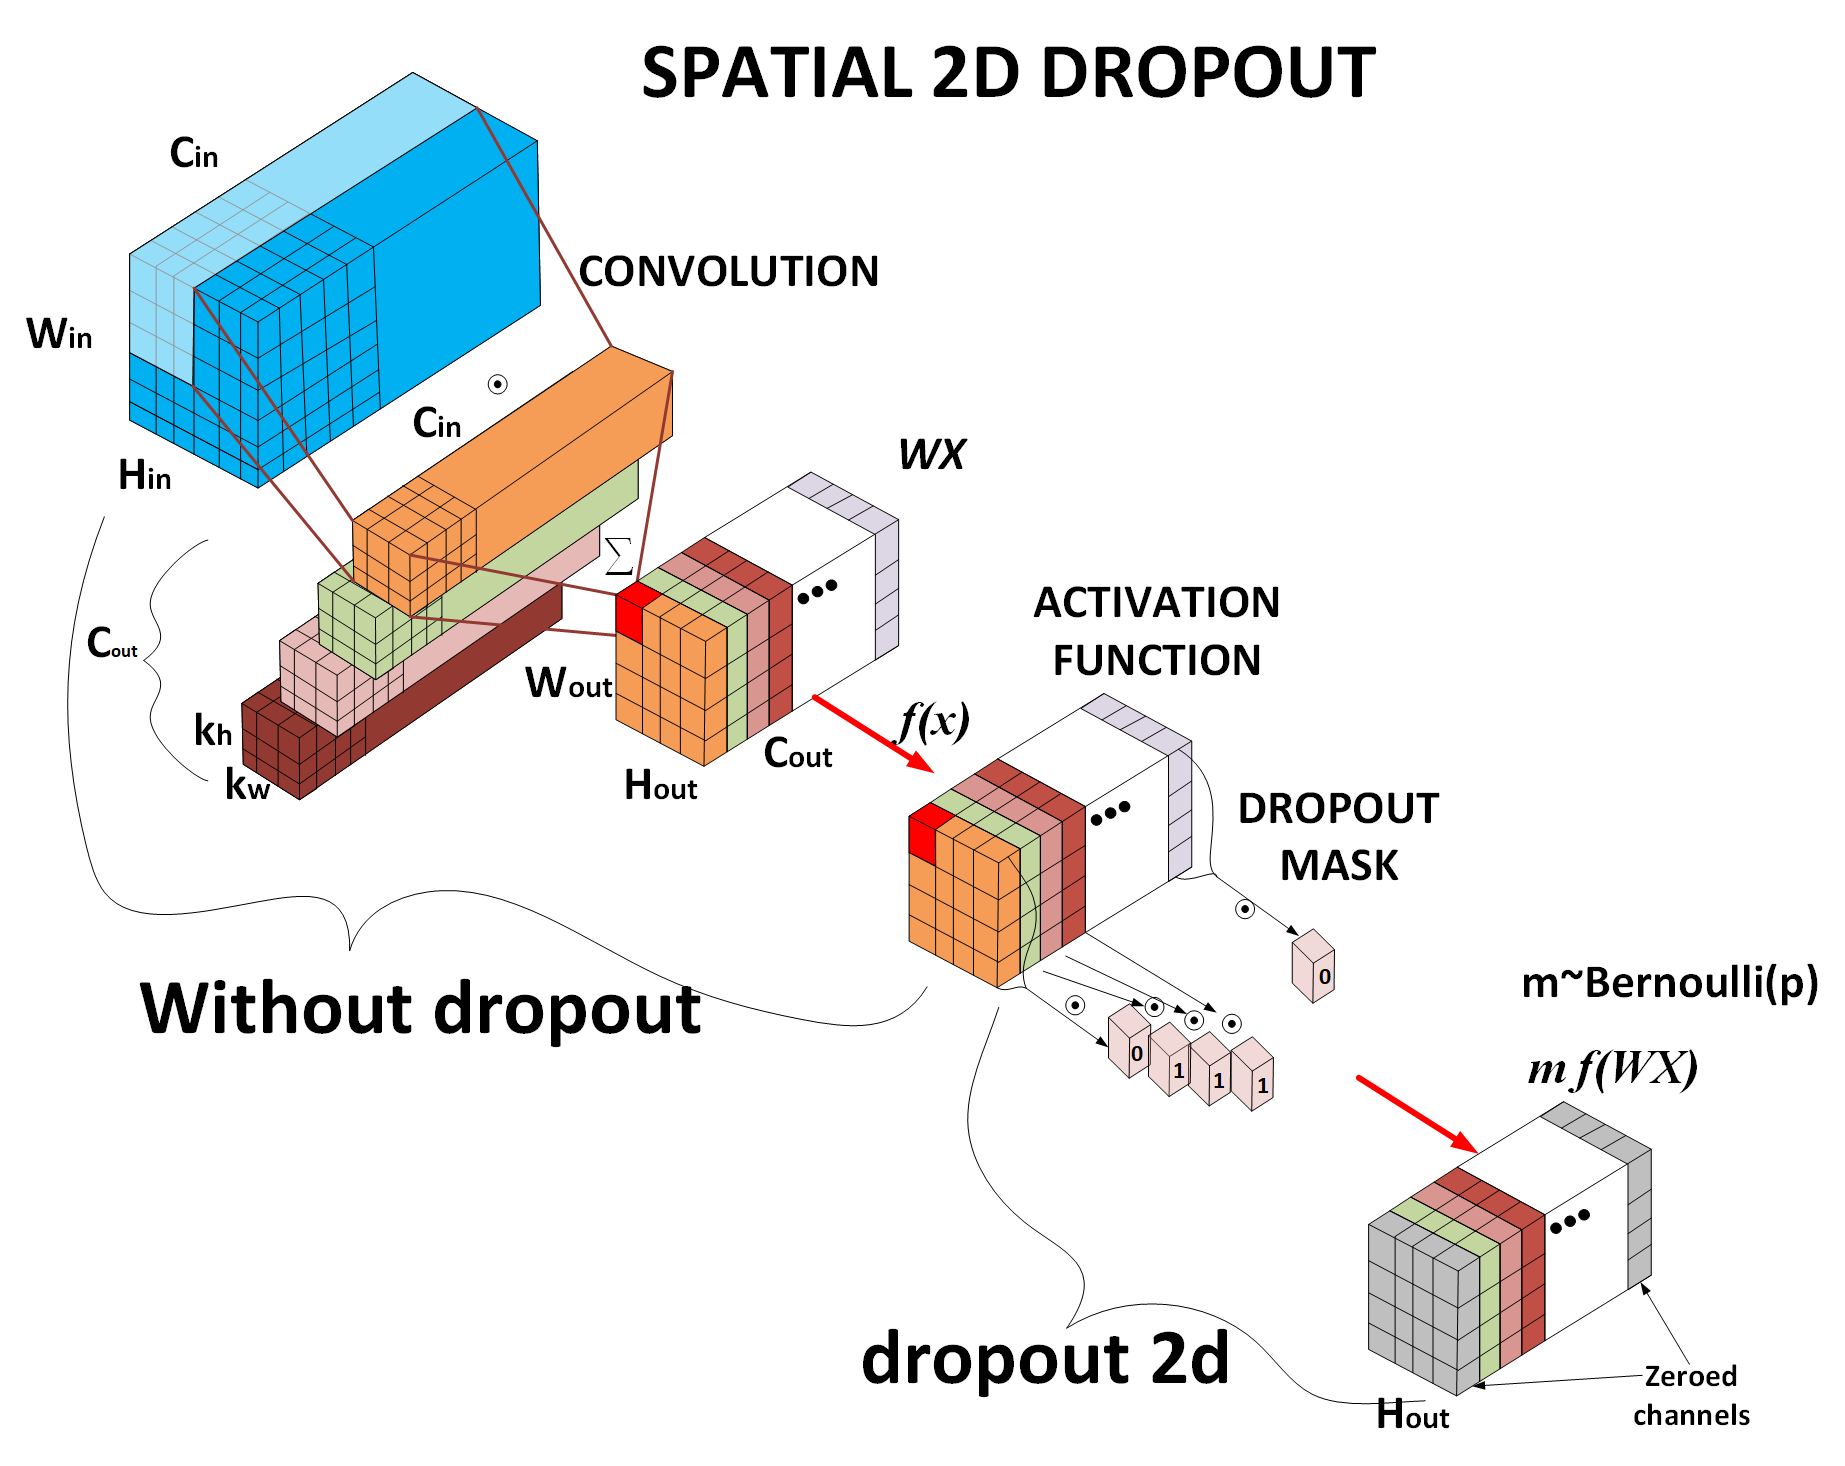

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
    <em>Note</em>Beside the channel dropout in some case you can only make it with some pooling with sliding kernel for activation function output (with stride = kernel size and output size = input size).
    

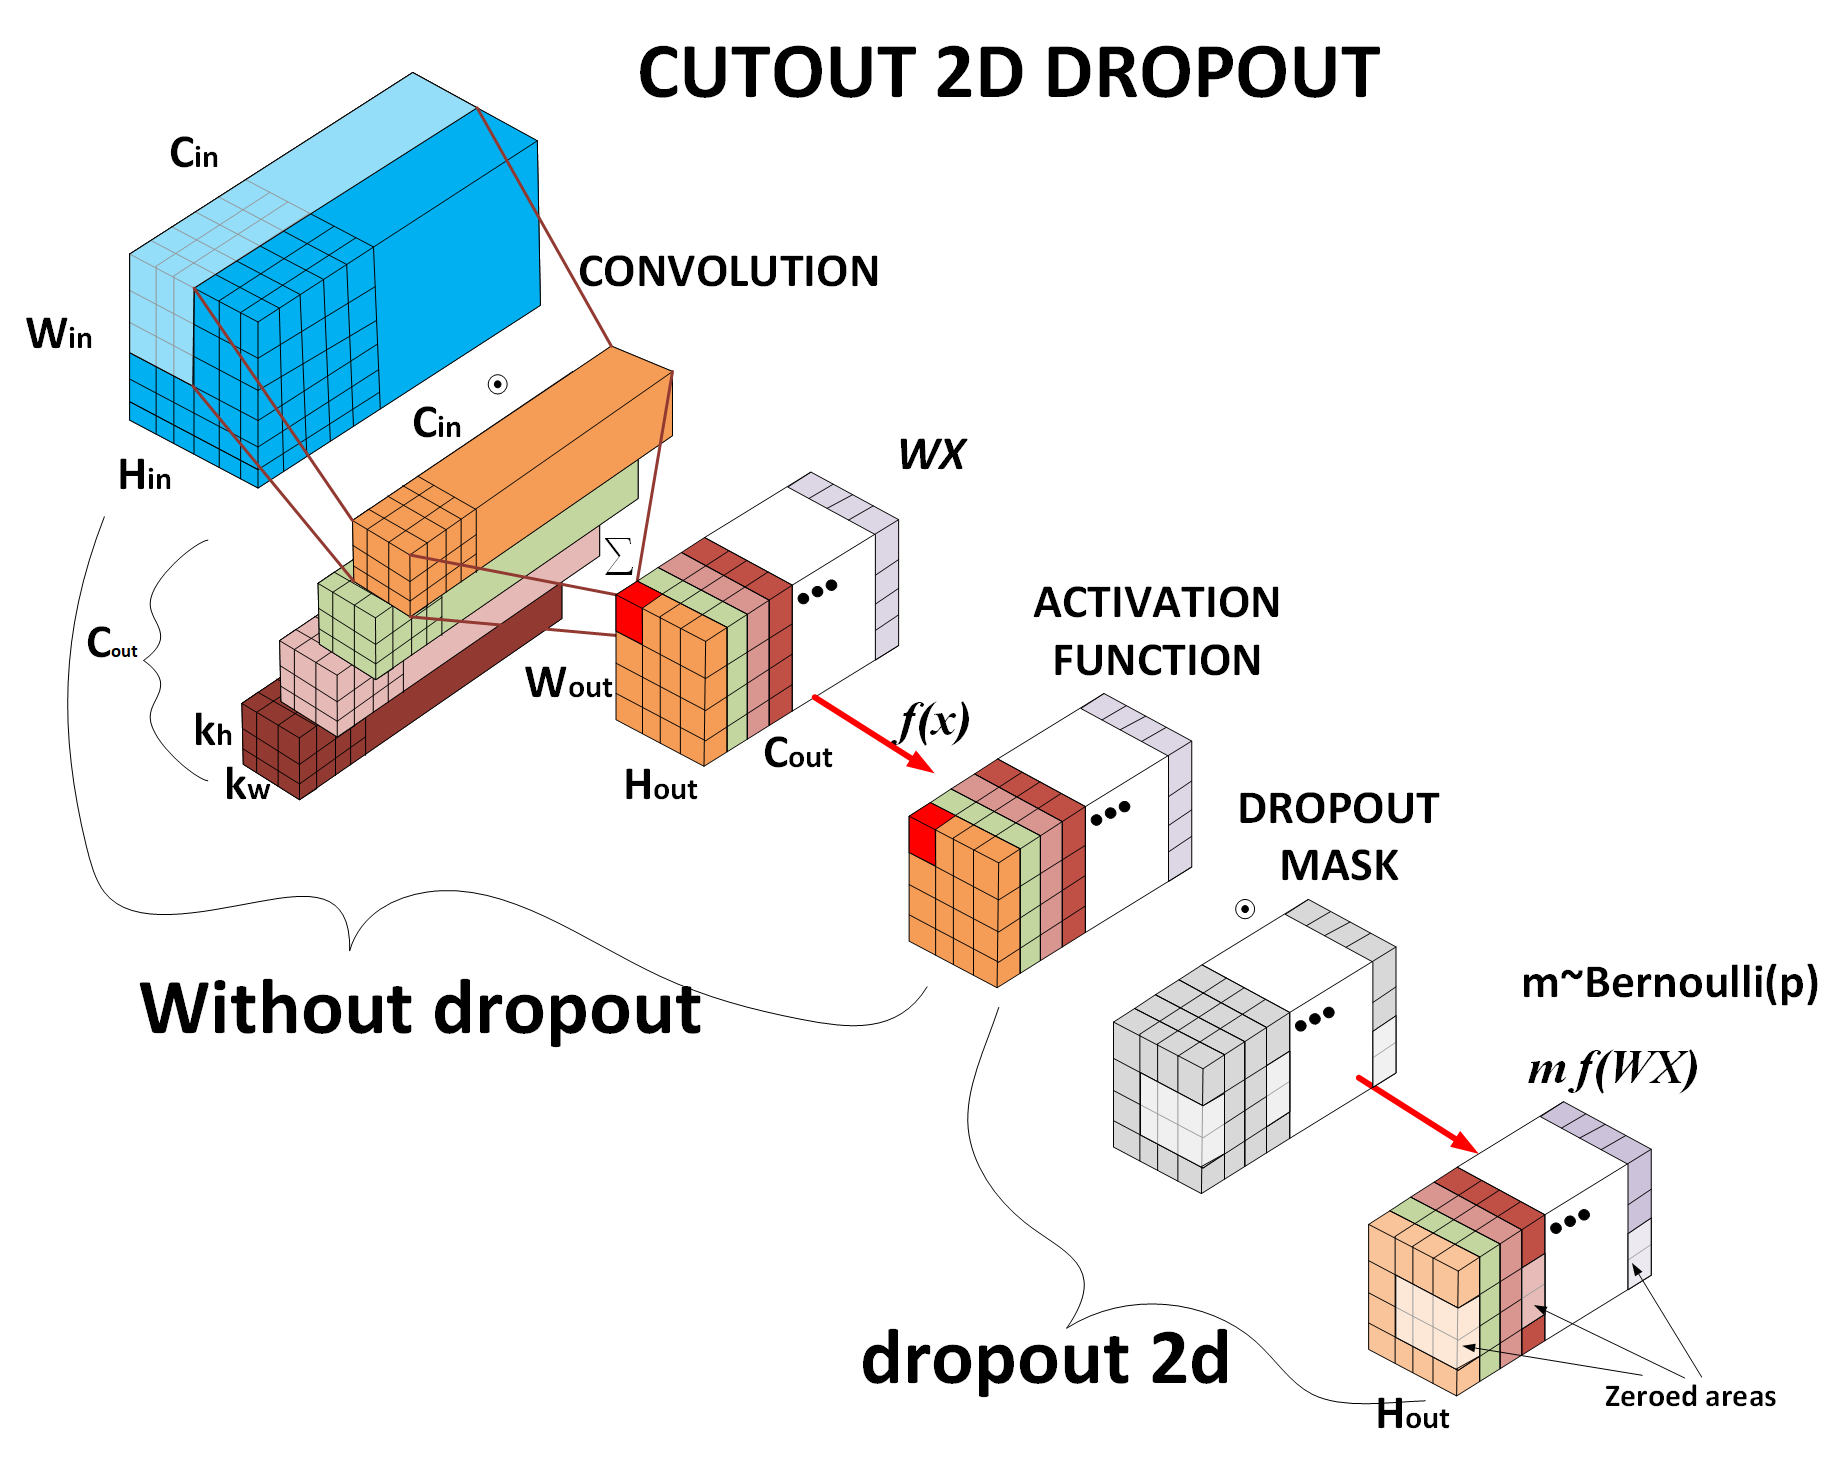



<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'> 
Beside the Dropout 2D it can be distinguished the following its extensions: <ul>
    <li> <b>Gaussian Dropout (variational Dropout)</b>
            $$
    \begin{aligned}
        &\text{train phase: } \\
          &  y = \text{channel}\{f(W^T \cdot X)\}_{W\times H} \odot m, m\sim N(1,p(1-p))
        \\\\
        &\text{evaluate phase:}\\
          &  y = \text{channel }\{f(W^TX)\}_{W\times H},
    \end{aligned},
    $$
    where $N(1,p(1-p))$ is the normal distribution with mean value 1 and variance $p(1-p)$.<br>
    The main idea here is to make training faster. I.e. if you use Bernoulli dropout with high rate, than learning rate of full network is growing due to some weights are not learning in each epoch. Using of Gaussian dropout allow to learn all weights but with some coefficients. <br>
        <em>Note</em><ul>
        <li> Similar to this dropout effect can be achieved using Gaussian Noises to each feature map.
        <li> You can also add some noises for your data    
        <!--     https://towardsdatascience.com/12-main-dropout-methods-mathematical-and-visual-explanation-58cdc2112293 -->   
<!--     https://rinat-maksutov.medium.com/deep-study-of-a-not-very-deep-neural-network-part-5-dropout-and-noise-29d980ece933 -->

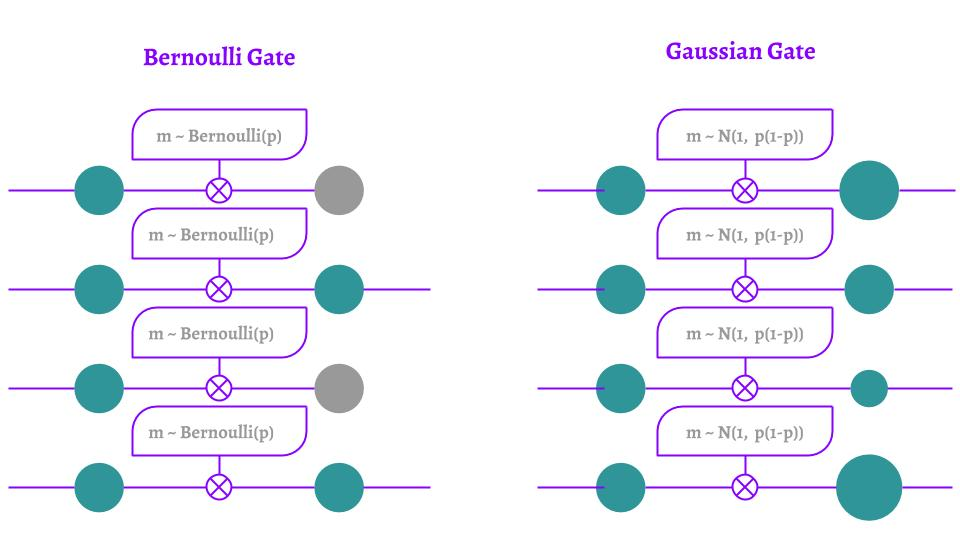

<!-- https://www.programmersought.com/article/93804605444/ -->

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'><ul>
    <li> <b>Alpha Dropout (for <u>SELU activation function only</u>)</b>
        $$
    \begin{aligned}
        &\text{train phase: } \\
          &  y = \begin{cases}
            \text{channel}\{f(W^T \cdot X)\}_{W\times H} & \text{ with probability $p$}
                \\\\
            f(-\infty)= -\alpha & \text{ with probability $1-p$}
            \end{cases}
        \\\\
        &\text{evaluate phase: }\\
        &    y = \text{channel}\{f(W^TX)\}_{W\times H}
    \end{aligned},
    $$
    where 
        $$
f(x) = \text{SELU}(x) = \lambda
    \begin{cases}
    \mbox{$x$} & \mbox{if } x > 0\\
    \mbox{$\alpha e^x-\alpha$} & \mbox{if } x \leq 0
    \end{cases},
 $$
  In the Alpha Dropout we set output as negative saturation value of the SELU with probability  instead of setting activations to 0 in the standard dropout. The meaning of this trick is to keep unchanged mean and variance of network after dropout operation.
<!-- https://rinat-maksutov.medium.com/deep-study-of-a-not-very-deep-neural-network-part-5-dropout-and-noise-29d980ece933 -->

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
    <em>Note</em><ul> for Tanh activation function $\alpha$-dropout will give you -1 instead of 0 in conventional dropout.

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
    <li> <b>Pooling Dropout</b><ul>
     The other modification can be to use dropout for pooling layer (e.g. maxpooling or average pooling). The  operation is based on the idea of add some distribution to the activations of pooling player - thus make it output more variational in training. However in the test Pooling Dropout act as some averaging of pooling operation.<br>
<!--         https://arxiv.org/ftp/arxiv/papers/1512/1512.01400.pdf -->
It can several variants of this pooling: <ul>
<li> Bernoulli distribution: <ul>
<li> Max-pooling:
$$
\begin{aligned}
        &\text{   train phase:} \\
        &    y = \max\{\text{pooling}_{\rm size}(y)\odot M_{\rm size} \}
        \\\\
        &\text{evaluate phase:} \\
        &    y = (1-p)\max\{\text{pooling}_{\rm size}(y)\}
\end{aligned},
$$
<li> Average pooling:
$$
\begin{aligned}
        &\text{   train phase:} \\
        &    y = \frac{1}{\rm size}\sum_{\rm size} \{\text{pooling}_{\rm size}(y)\odot M_{\rm size} \}
        \\\\
        &\text{evaluate phase:} \\
        &    y = \frac{1}{\rm size}\sum_{\rm size} \{\text{pooling}_{\rm size}(y)\}
\end{aligned},
$$ 
where  $M_{\rm size}$ - is the mask for maxpooling, $M_{ij}\sim \text{Bernoulli}(p)$ .             
    </ul>           
<li> Normal distribution (<b>Max-Drop</b>): 
$$
\begin{aligned}
        &\text{   train phase:} \\
        &    y = \max\{\text{pooling}_{\rm size}(y)\odot M_{\rm size} \}
        \\\\
        &\text{evaluate phase:} \\
        &    y = \mu \max\{\text{pooling}_{\rm size}(y)\}
\end{aligned},
$$
where  $M_{\rm size}$ - is the mask for maxpooling, $M_{ij}\sim N(\mu,\sigma)$ .             
    </ul>  
<!--         https://towardsdatascience.com/12-main-dropout-methods-mathematical-and-visual-explanation-58cdc2112293 -->

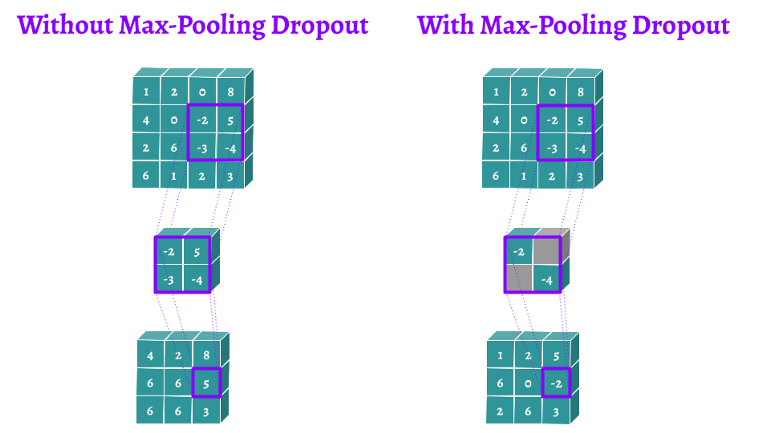

<!-- https://towardsdatascience.com/12-main-dropout-methods-mathematical-and-visual-explanation-58cdc2112293 -->

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
    <em>Note</em> Pooling dropout is the similar to random pooling.

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'><ul>
<!--     <li> <b>Cutout Dropout</b><ul>
        The another way to exclude a part of  -->

### Batch Normalization

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
 Essentially, each layer of neural network during the training learns to fit an input data distribution (i.e. distribution of data for each bath). Thus, if each mini-batсh will give different distribution then it will lead to the analog of appearing some non-stationary in data and hence to the unstable of gradients in each batch.
    <ul>This phenomenon of shifting input distributions is known as the Internal Co-variate shift.</ul>
The shifts of the distributions can be suppressed using through-the-batches normalization.
The normalized data will have here zero mean value and 1 variance. However, the normalized data can be scaled to the purpose of obtaining it in the optimal range to update the weight and avoid the gradient vanishing and exploding. The technique implements aforementioned is known as <br>
 <b>Batch Normalization</b>:
    $$ y_i \leftarrow \gamma\frac{y_i-\mu_{B}}{\sqrt{\sigma_B^2+\epsilon}}+\beta,$$
    where:<ul>
        <li> $m$ is the mini-batch size. 
        <li>$\mu_B \leftarrow \frac{1}{m}\sum_{i=1}^m y_i$, is the mean value of batch:
            <ul> actually, after each bath $\mu_B$ is updated as: 
                $$\mu_{B_{\rm NEW}} = (1-w)\cdot\mu_{B_{CURRENT}} + w\cdot \frac{1}{m}\sum_{i=1}^m y_i,$$
                Where $w$ is the moment of exponential averaging; 
                $\mu_{B_{CURRENT}}$ is the current value, 
                $\mu_{B_{\rm NEW}}$ is a new value. </ul>
        <li>$ \sigma_B^2  \leftarrow \frac{1}{m}\sum_{i=1}^m (y_i-\mu_B)^2 $  is the variance of batch; 
             <ul> actually, after each bath $\sigma_B$ is updated as: 
                $$\sigma_{B_{\rm NEW}}^2 = (1-w)\cdot\sigma_{B_{CURRENT}}^2 + w\cdot \frac{1}{m}\sum_{i=1}^m (y_i-\mu_B)^2,$$
                Where $w$ is the moment of exponential averaging (same value as for $\mu_B$); 
                $\sigma_{B_{CURRENT}}$ is the current value, 
                $\sigma_{B_{\rm NEW}}$ is a new value. </ul>
        <li> $\gamma$, $\beta$ are scaling parameters, <u>trainable during back-propagation.</u>;
        <li> $\epsilon$  some small constant to avoid zero dividing.          
      </ul>  <br>
The using of <b>Batch Normalization (BN)</b> allow to:<ul>
<li> Avoid unstable gradients (Normalization).
<li> Decrease the probability of exploding and vanishing gradients (Scaling).    
<li> Reduce the effects of network initialization on convergence.
<li> Allow faster learning rates leading to faster convergence.
 <li> Improves generalization accuracy.  
<!--     https://towardsdatascience.com/batch-normalization-an-intuitive-explanation-42e473fa753f -->
<!--      https://arxiv.org/pdf/1806.02375.pdf 
<!--      https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html 
https://leonardoaraujosantos.gitbook.io/artificial-inteligence/machine_learning/deep_learning/batch_norm_layer
-->

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
    Traditionally we use batch norm is applied before activation function but this question is the issue of debates
    

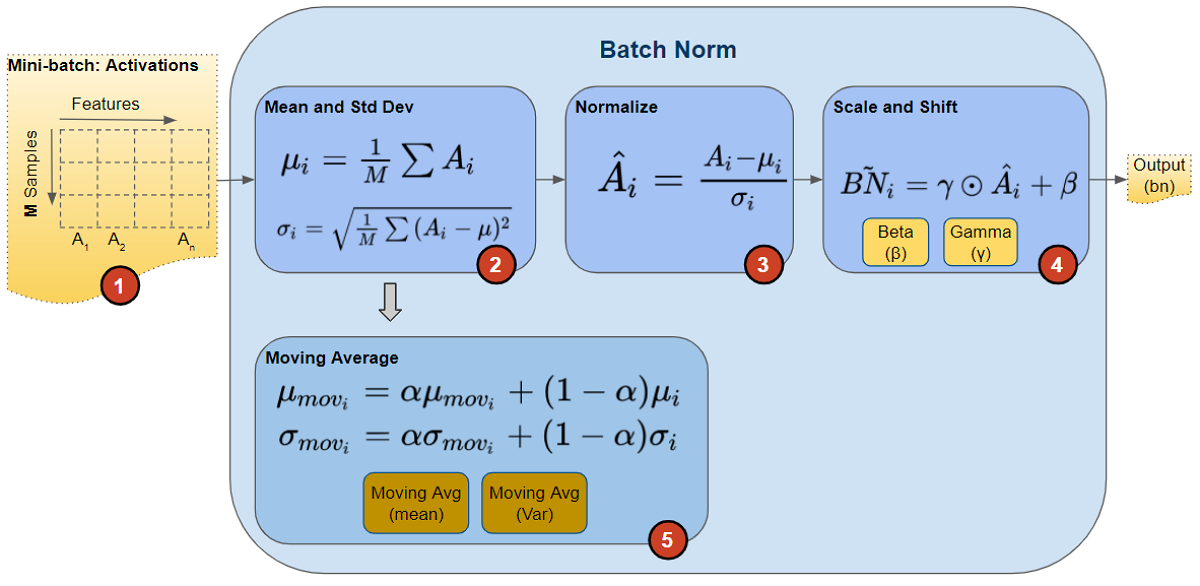

<!-- https://towardsdatascience.com/batch-norm-explained-visually-how-it-works-and-why-neural-networks-need-it-b18919692739 -->

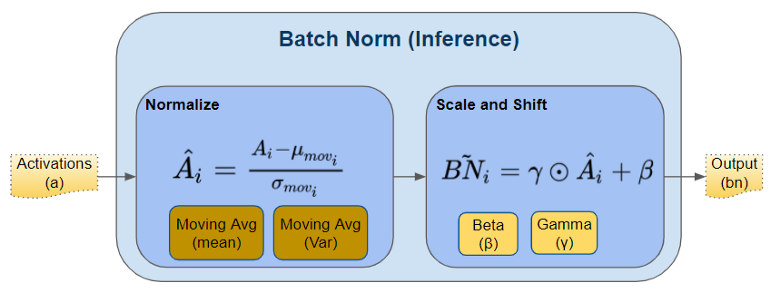

<!-- https://towardsdatascience.com/batch-norm-explained-visually-how-it-works-and-why-neural-networks-need-it-b18919692739 -->

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
    <b> Advantages of Batch Normalization</b>:<ul>
<li> Regularization of difference in statistics due to averaging.    
<li> Reducing the dependence of gradients on the scale and shift of the instances of data. 
<li> The learning rate can be increased due to regularization - thus acceleration the training.    
<li> it is shown that network coverage faster if data is whitening (have normal-like distribution wit zero mean, and almost constant small variance).    
 </ul>
<b> Disadvantages of Batch Normalization</b>:<ul>
<li>Reducing of the accuracy in the case of the small batch size. 
    <ul> The averaging work well for a sufficiently large batch size.</ul>
<li> Performance stability depends on the stability of the batch size, thus can have difference accuracy on test then for training.   
    <ul>Example showcases are training VS inference, pretraining VS fine tuning, backbone architecture VS head.</ul>
<!--     https://ychai.uk/notes/2019/02/28/NN/Normalization-in-Neural-Networks-a-Survey/ -->
<!--     https://theaisummer.com/normalization/ -->

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'> 
Due to the some drawbacks of Standard Batch Normalization, it can be also considered<br>
    the following <b>types of Normalization</b>
<li> <b>Layer Normalization</b>  i.e. it is independent with batch dimension, normalizing the through-channels statistics. 
    <ul> Recalculation mean and variance for each batch in train and during the evaluation stage </ul>

<li><b>Instance Normalization </b>is applied on each image, doing normalization along (H,W) axis (It is for style transfer)
    <ul> Assembly mean and variance for each channel during the training, do not update parameters during the evaluation.<br> Instance Norm works similar to auto contrasting.</ul>

<li><b>Group Normalization </b>: divide the channel into groups, normalizing along the (H,W) axis and along each group separately.
     <ul> Recalculate mean and variance for each batch in train and during the evaluation stage.<br>
    Proposed for small batches, due to disadvantages of BN for this case. </ul>
    
<li><b>Switchable Norm</b>: use weighted sum of mean and variance obtained for each instance, layer and batch.
    
<li>Beside the BN for data <b>the weights can be also regularized</b><ul>
        <li> By norm of weights constraining,
        <li> Normalized similar to batch (batch norm, instance norm, layer norm and group norm).
        <li> <b>Spectrum Normalization</b> normalizing of weights of each layer by its matrix spectrum.<ul> i.e. $W\leftarrow W/\max(\lambda), $ where $\lambda$ is eigenvalue of weights covariation matrix.  </ul>
        </ul>
<!--     https://theaisummer.com/normalization/ -->
<!--     https://ychai.uk/notes/2019/02/28/NN/Normalization-in-Neural-Networks-a-Survey/ -->

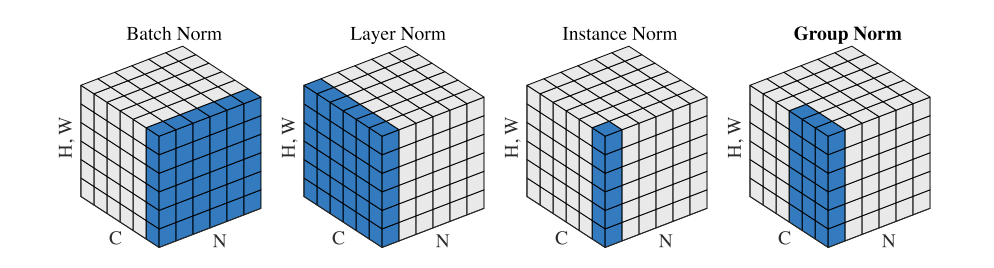

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'> Another illustration of channel $C$, number of instances in batch ($N$) and channel size ($H\times W$).
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    

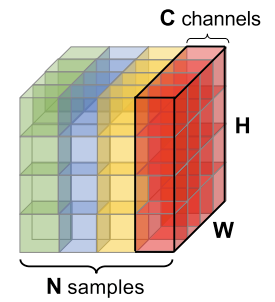

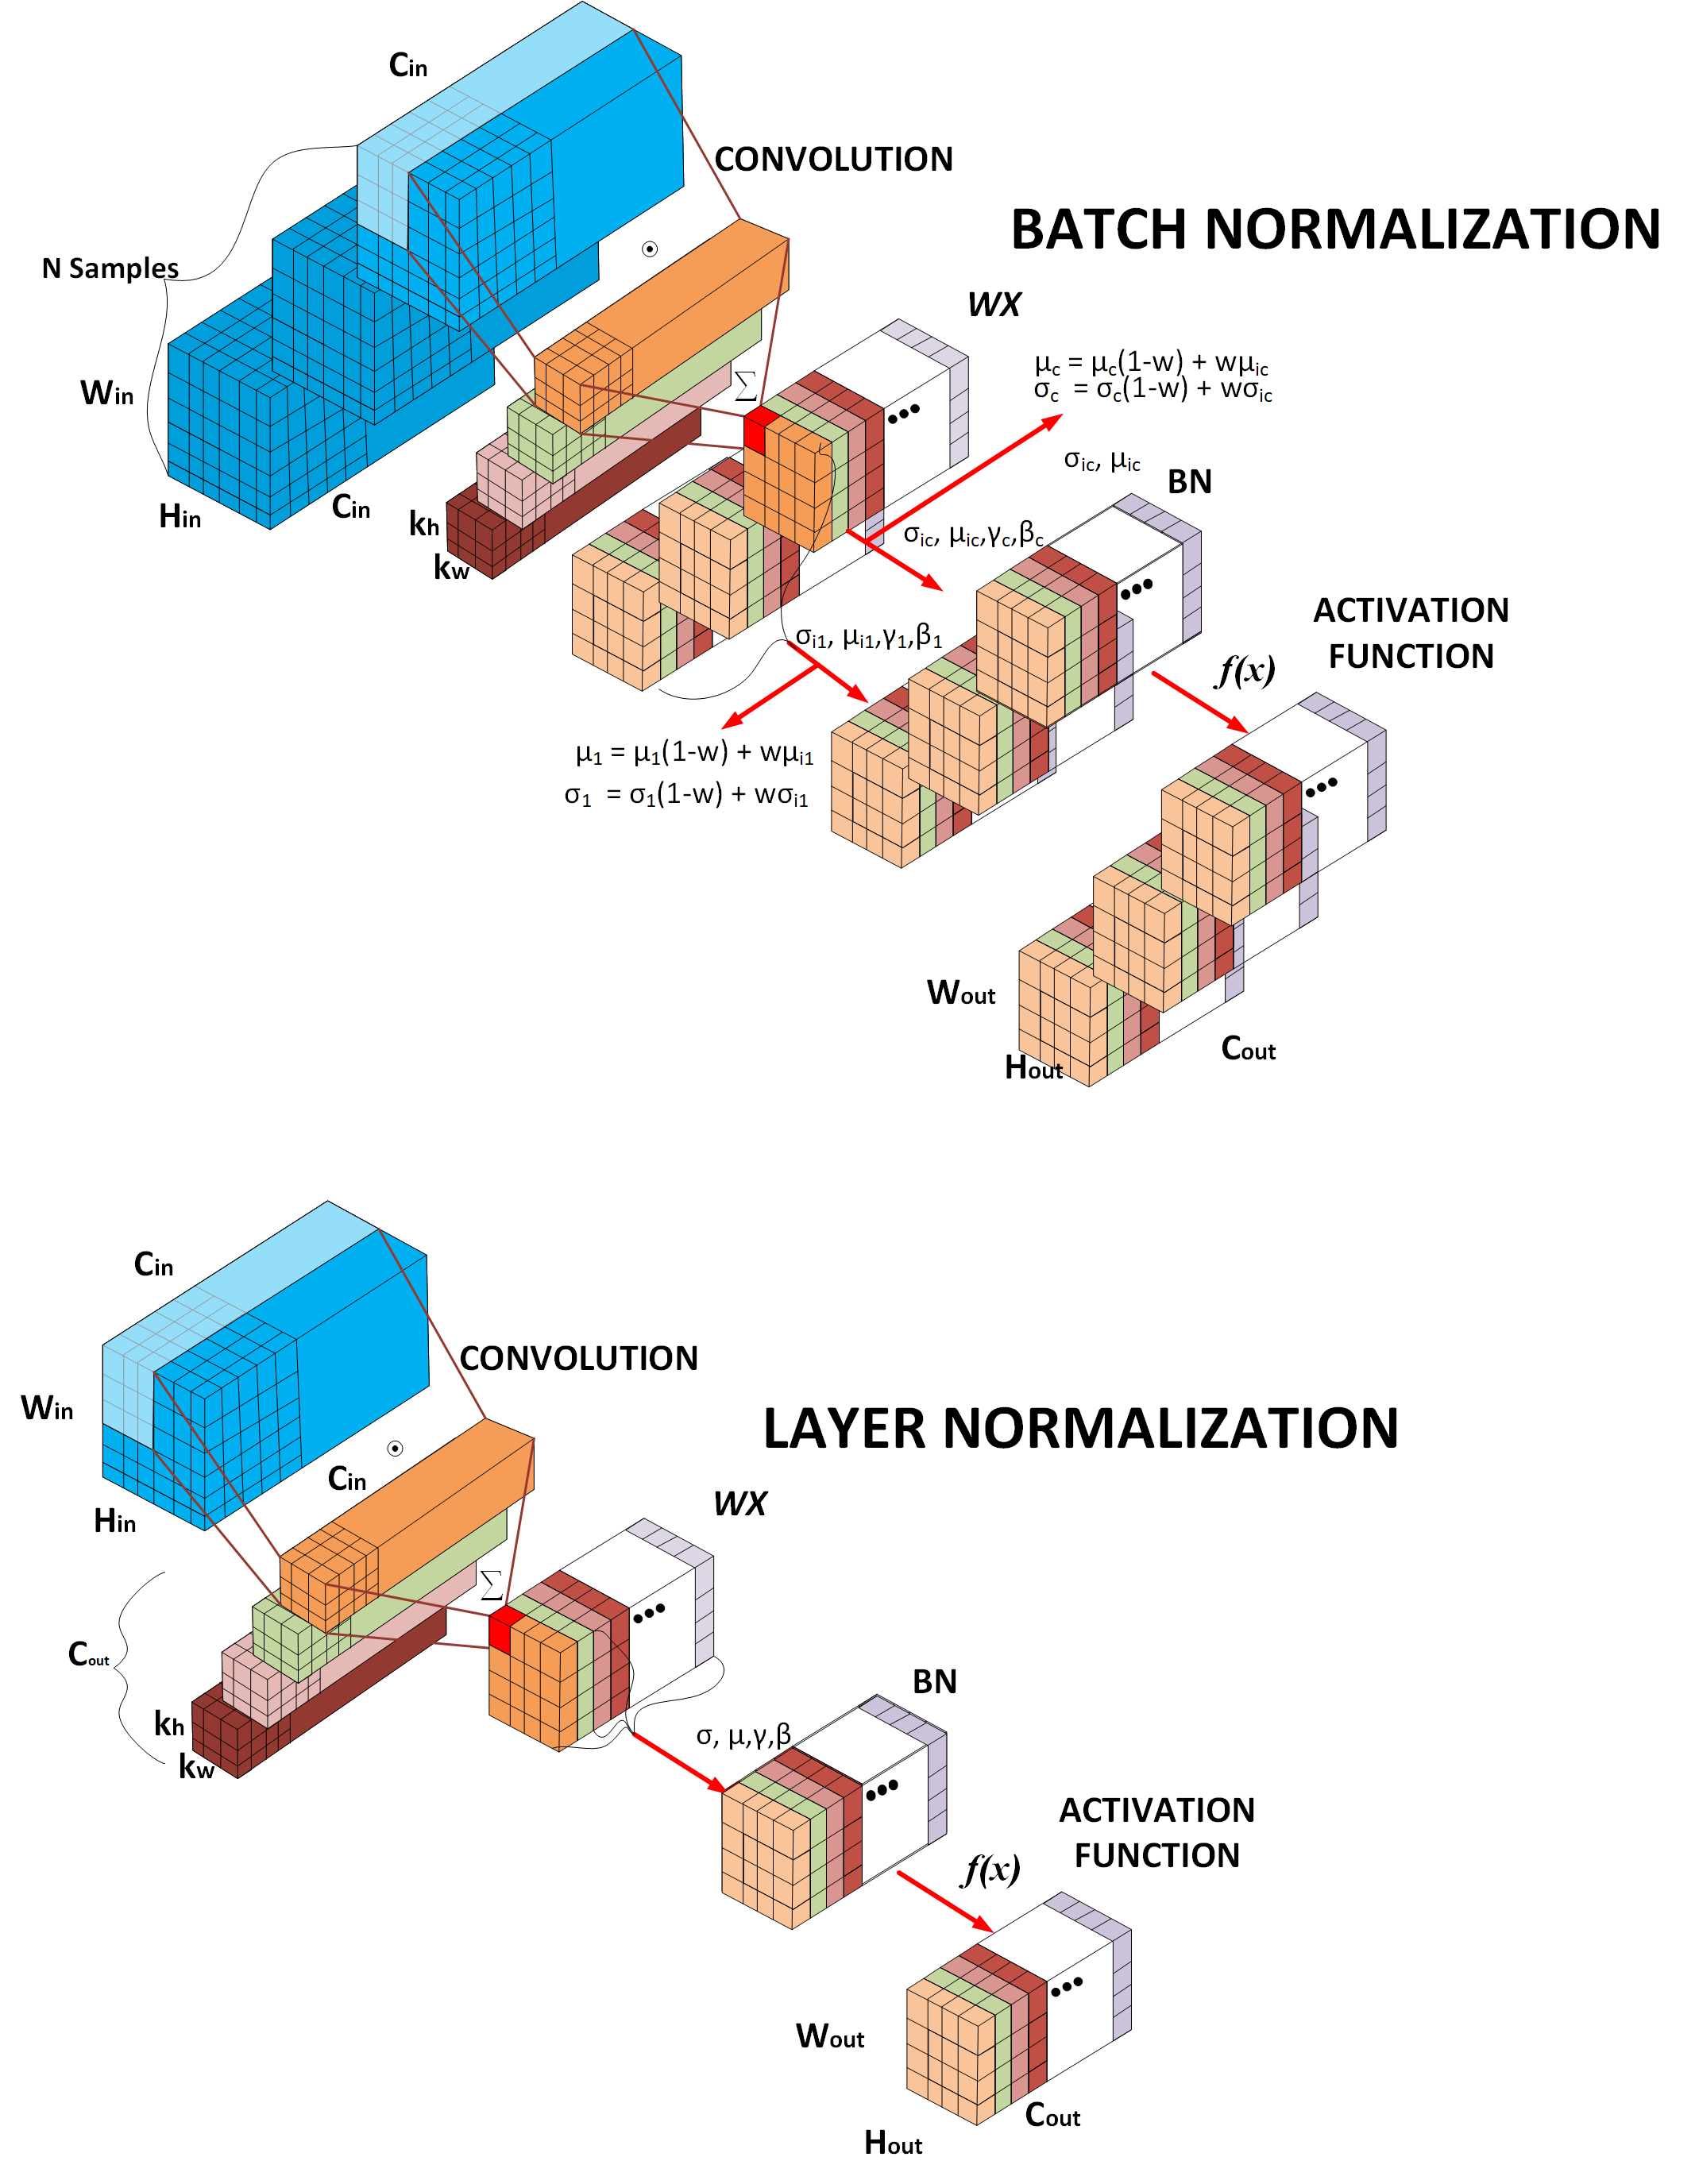


## Optimization of Training

### The Gradient Descent Method

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'> 
    The problem of training can be written as 
    $$ e(W,X)=L\big(y -f(W^TX)\big)\to min, $$ 
where 
<ul>
    <li> $e(W,X)$ is the error of training,
    <li> $L$ is the loss function,
    <li> $f(W^TX)$ is the some non-linear result of the network or its layer
        <ul>
        <li> $W$ is the weights matrix;
        <li> $X$ is the layer input;
        <li> $f(\cdot)$ is the activation function. 
        </ul>   
</ul>
Thus the our task is to minimize the error of network work, i.e. minimize the loss function value.
    <br>
In other words, we can proposed that for optimal weights $W$ the value of $e(W,X)$ is sufficiently small, and hence the task is to select the $W$ values optimally. 
The easier way to optimize W is make it iteratively. For this we can write the truncated Taylor Series transformation can be written for scalar value $W$ as $e(W,X)\approx e(W^*,x)+e' (W^*,x )(W−W^* )$ and for matrix of weights as
    $$ e(W,X)\approx e(W^*,x)+(\nabla_W e(W^*,x))^T(W−W^*), $$
where <ul>
    <li> $W^*$ is the point of Taylor Series transformation,
    <li>$\nabla_W = \{\frac{\partial}{\partial W_1}, \frac{\partial}{\partial W_2}, ..., \frac{\partial}{\partial W_N}\},$ and $N$ is the number of weights.<br>
     <li>$\nabla_W e(W^*,x)$ is the gradient of error function, we can rewrite it as $\nabla_W L(y,W^*,X)$.
    </ul>
    For the the iterative process with steps $1,...,t-1,t,... N$. on the each step:
    $$e(W^t,X)\approx e(W^{t-1},x)+(\nabla_W L(W^{t-1},X,y))^T(W^t-W^{t-1}). $$
In the derivation above the error was the matrix. But for one value estimation we need to take some norm of this error matrix for Frobenius Norm we have the following
    $$
    \|e(W^t,X)\|\approx \|e(W^{t-1},x)\|+\|\nabla_W L(W^{t-1},X,y)\|\|W^t-W^{t-1}\|\cos(\gamma), 
    $$
where $\gamma$ has the meaning of scalar product of vectors. In other word it shown the angle between vectors $\nabla L(W^{t-1},X,y)$ and $W^t-W^{t-1})$. The difference between $e(W^t,X)$ and $e(W^{t-1},X)$ attains the minimum when
    $\nabla L(W^{t-1},X,y)$ and $W^t-W^{t-1})$ would be in opposite directions, thus $\cos(\gamma) = -1$ and
$$
W^t-W^{t-1}\approx - \nabla L(W^{t-1},X,y).
$$
The task of iterative minimization  can be rewritten as the<br>
    <b>The Gradient Descent Method</b>
    $$
    W^t=W^{t-1} -\eta \nabla L(W^{t-1},X,y),
    $$
where $\eta$ is the learning rate.<br>
The routine of training need to be stopped if 
<ul>
    <li> $t\geq t{limited},$
    <li> $\|W^t\| - \|W^{t-1}\|<\epsilon,$
    <li> $e(W^t,X)-e(W^{t-1},X)<\epsilon,$ 
    <li> Early-stop by Cross-validation.
</ul> 
<em>Notes</em>
<ul>
    <li> The gradient descent means that we move weights $W$ in  the opposite direction to the gradient increasing.
    <li> if $L=L(y,f(W^TX))$, than $W^t=W^{t-1}-\eta \frac{\partial L}{\partial f}\nabla f^T (W^{t-1}X)X$
    <li> Iteration routine  does not guaranty that reached minimum would be the global minimum.  
    <li> In general $\eta$ could be changed during the training.
    <li> The solution $W^*$ may depend on the initialization procedure, If the loss function behavior supposed no to be smooth everywhere.
    <li> frequently each iteration can be called epoch.
    <li> The minimum value for train data can lead to the   overfitting, thus use the cross-validation to prevent it.  
    <li> The local and global minimums of function corresponds to zeros of its gradient, thus then closer to the zero then smaller the gradient value.
</ul>    

### Cross-Validation 

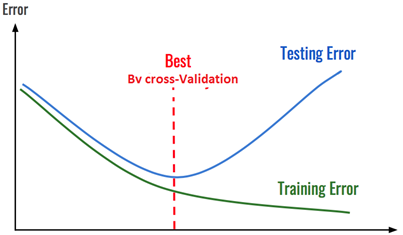

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'> 
The problem: depend on the validation data we can have best cross-validation result in different place, and with different score.

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'> 
    Towards the <b>Cross Validation</b> It is need to note that a several techniques can be applied:
    <li> <b>Holdout Method </b> <ul>
        <li> Randomly splits the dataset into train and test parts.
            <ul> Traditional splitting is 30% for validation (tests during the training) and 70% for train.<br>
            For small dataset validation part can be set as 50% of data.</ul>
        <li> Main advantage here is simplicity and lack of requirement to retraining.
        <li> Main drawbacks are:<ul>
         <li>  requirement of large dataset 
         <li>   and low applicability for imbalanced data.  
         <li>   can provide biased result (depend on the validation data).
            </ul>
       </ul>

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'> 
   <li> <b>K-fold Cross Validation</b> <ul>
     <li> Split dataset into $k$ equal subparts (folds),
     <li> Select training data as $k-1$ groups and remaining group as validation and training the model.
     <li> Repeat the previous item k time and train $k$ models.    
     <li> The average error through the all models is a measure of the network performance.   
     <li> Then higher $k$ is selected then more unbiased estimation of error you can obtain but it lead to increasing of the training time,
         <ul>Traditional choose is $k=10$.
     <li> Main advantages here are:<ul> 
         applicability for small datasets,<br>
         all data are taken into account in the both train and validation, <br>
         technique can be applied to architecture selection for your data or for hyperparameter optimization. </ul><br>
     <li> Main drawback here is the increasing the of the time of training and low applicability for imbalanced data in straight implementation.
         </ul></ul>
A variants of K-fold method are <ul>
       <li> <b> Random K-fold</b> (<b>Repeated random subsampling validation</b>)<ul> 
             Randomly divide the data into a test and training set k different times. The advantage of doing this is that you can independently choose how large each test set is and how many trials you average over.</ul>
       <li> <b> Balanced K-fold</b> (<b>Stratified k-fold</b>) <ul>
             First split data on the classes, than, select k-folds, such that for all folds data will be evenly distributed.
             </ul>

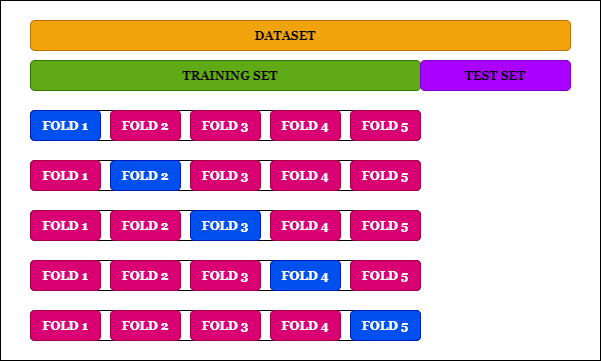
<!-- https://medium.com/the-owl/k-fold-cross-validation-in-keras-3ec4a3a00538 -->

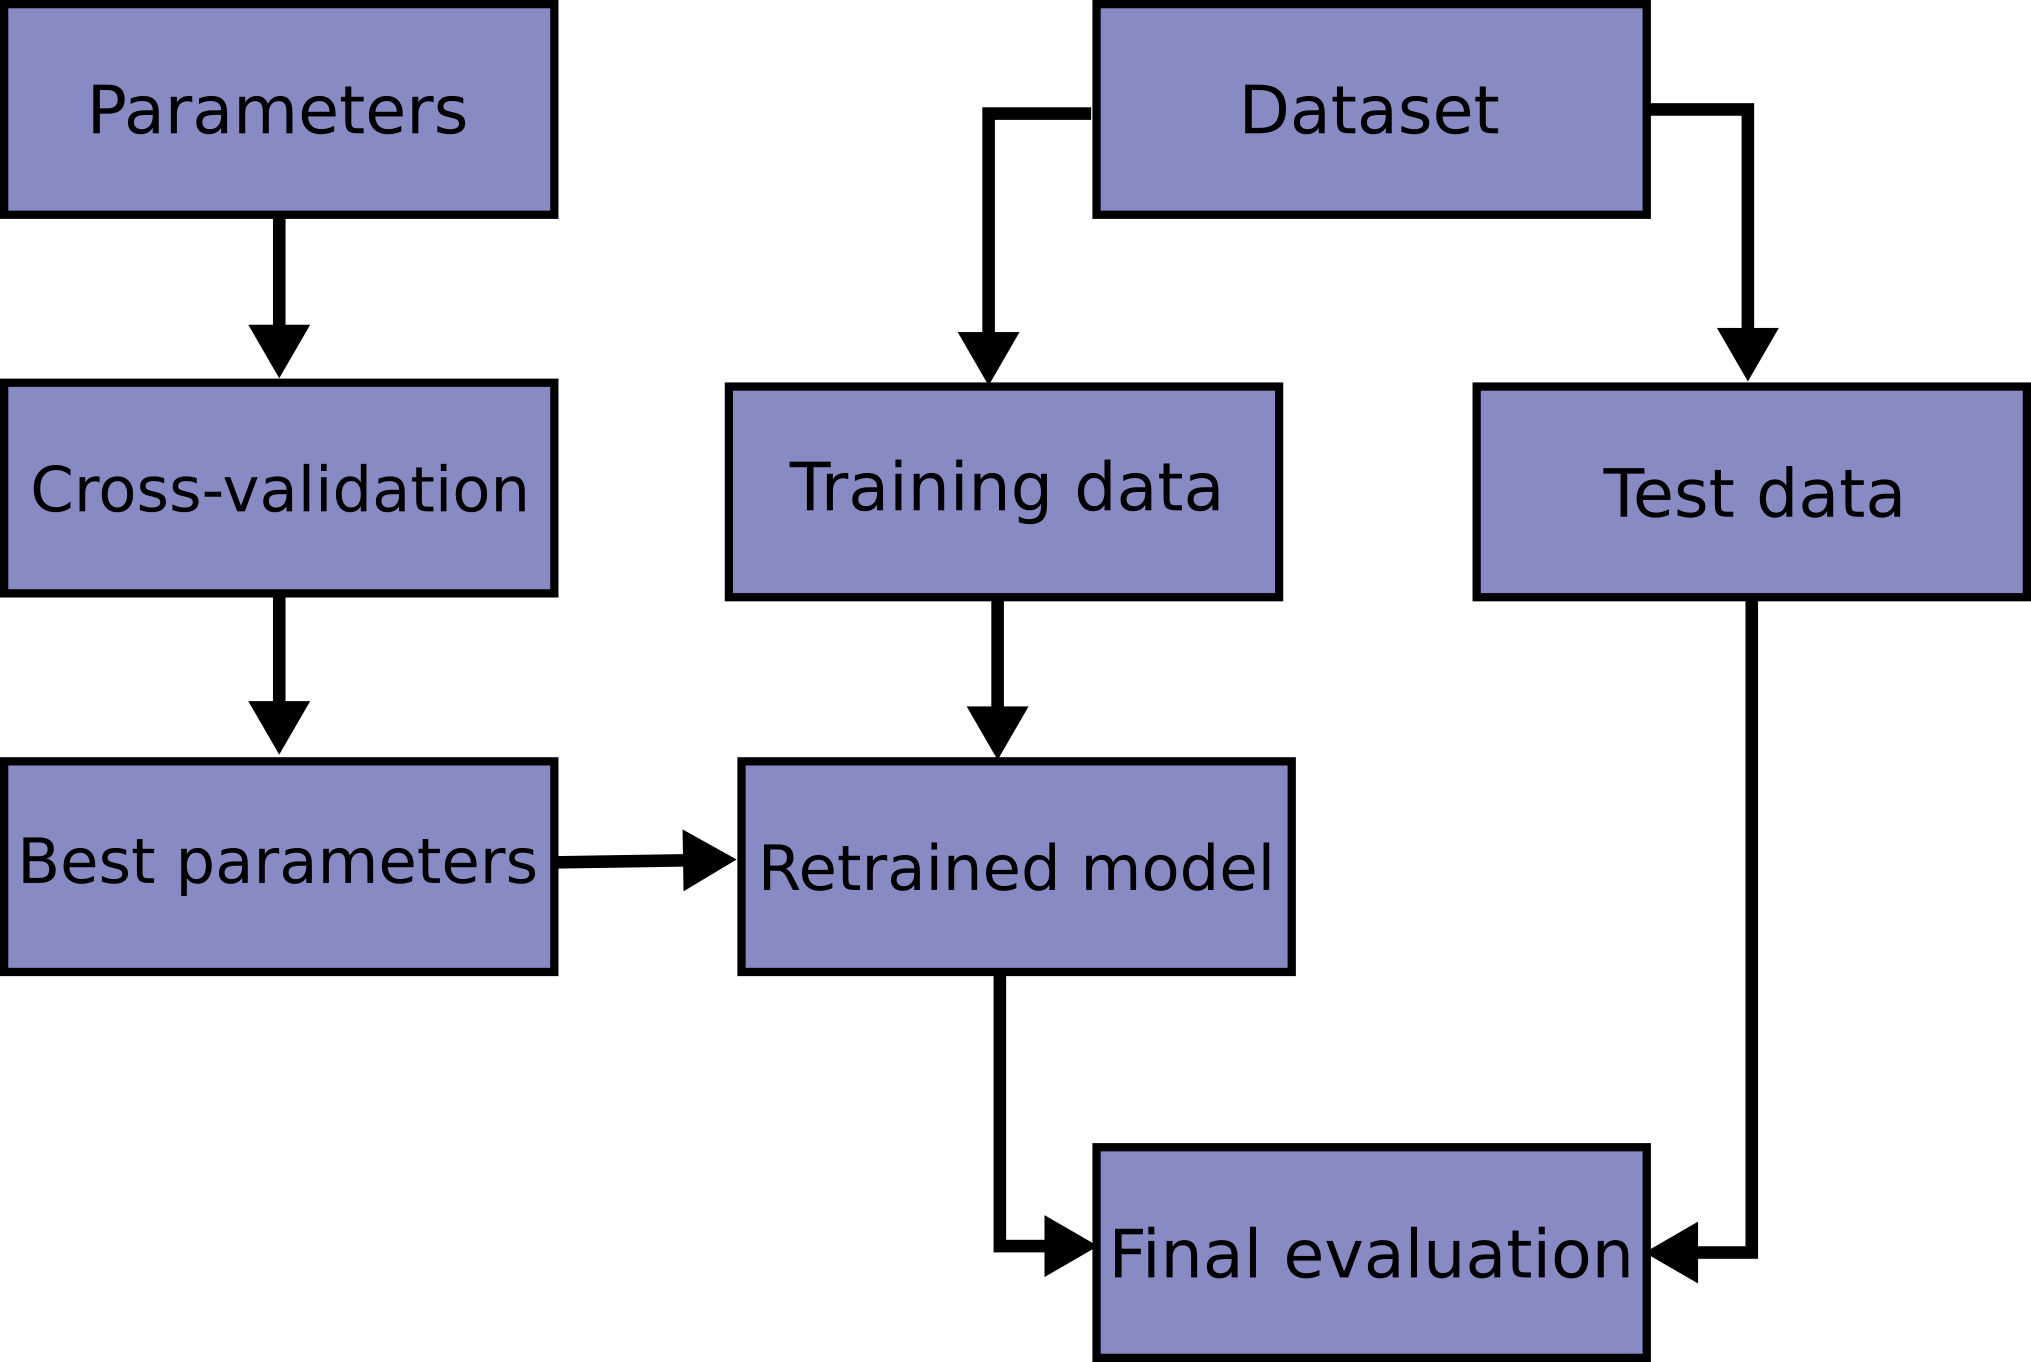

<!-- https://scikit-learn.org/stable/modules/cross_validation.html -->

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'> 
 <li> <b>Leave-p-out cross validation, (LpOCV)</b> (<b>Leave-one-out, LOO)</b> <ul>   
    <li> Split the data into one or $p$ and rest of dataset.
    <li> Train data on the $\rm{all} - p$ data an test for $p$ data.    
    <li> Repeat previous item $p$ times.
    <li> Use the average error as estimation of model performance (leave-one-out cross validation error, LOO-XVE).    
    <li> The main advantage of the method is small bias of the error.
    <li> The main drawback is the exhaustively large computation time.
     </ul>
     <ul>
<em>Note</em> In some cases it can be proposed other custom techniques of cross-validation.
<!--         <ul> In some case time can be reduce if the weight change will be restricted<br>
            For instance, for hyperparamter tuning in the case of pretrained model.</ul> -->
<!--
         https://www.analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/
         https://www.upgrad.com/blog/cross-validation-in-machine-learning/
         https://www.cs.cmu.edu/~schneide/tut5/node42.html
         https://towardsdatascience.com/understanding-8-types-of-cross-validation-80c935a4976d
-->    


### Gradient Descent Optimization

#### Stochastic Gradient Descent

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'> 
In the case of big dataset size it may be complex to take all instances into account together. Thus we need to calculate only some batches (<b>Mini-Batches</b>) through each time.<br>
    If the <b>Mini-Batches</b> are taken randomly the method will be called<br>
    <b>Stochastic Gradient Descent</b> method using mini batches (<b>SGD</b>)
    <ul> 
        <li> For each mini-batch in training data apply back-propagation.
        <li> The loss and all measures of the epoch can be calculated as average trough corresponding values obtained for rach batch.
            <li> Use the validation in similar to train manner after carried out training for all mini-batches. I.E. average loss on validation is the average of values for all evaluated mini-batches.
        The main drawback here is high variation (high dispersion) of learning,
        for it reducing either use adaptive modifications of SGD or use moving averaging of each SGD measures.</ul>
<!--    :<ul>
<li> The instances of data for the each iteration (each batch) are chosen randomly 
<li> The loss function recalculated for all samples.
<li>	 The method can reach to the outliers (virtual ill-  conditioned problem)
<li>	 For the outlier expectation the regularization recommended:
w^t=w^(t-1) (1-θη_t )-η_t ∇E(w^(t-1)) 
-->

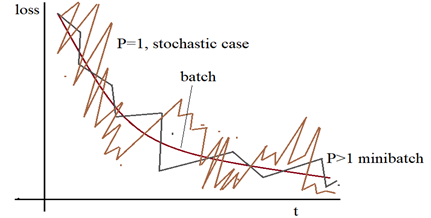

#### LR Scheduler

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'> 
For implementation of the gradient descent the main parameter is the learning rate $\eta$.<br>
    for select suitable initial learning rate note<ul>
    <li> If the learning rate is too high then loss will change with large spikes and coarse difference in values.
    <li> If the learning rate is too small then loss will almost no change.
    <li> For a suitable learning rate the loss will decrease confidently.</ul>     
It can chosen a several strategies of learning rate behavior through the training.<ul>
    <li> <b>Constant rate</b><ul>
        Slow convergence but obvious solution.<br> 
        Can serve as a baseline for us to experiments.<br> 
        Work if the the best LR is known well.
        </ul>
    <li> <b> Decay Rate</b><ul> 
       $$ \eta_t = \frac{\eta_{t-1}} {1 + \tau_t \cdot t}, $$
where $\tau_t$ is the decay coefficient, it can be<ul>
    <li> <b>Constant Decay</b> $\tau_t = const,$
    <li> <b>Step Decay</b> change $\tau_t$ to $\alpha\tau_t$ each $T$ steps, $\alpha=0.9$.
     </ul>  </ul>   
    <li> <b> Exponential Rate Scheduler</b><ul> 
    $$ \eta_t =  \eta_0\exp(-\alpha t),$$
 where $\alpha$ is the exponential decreasing rate.</ul>
     <li> <b>SquareRoot Scheduler</b>
    $$ \eta_t = \eta_0 (t + 1)^{-\frac{1}{2}} $$
<li> <b>Cosine Scheduler</b><ul>
    $$\eta_t = \begin{cases}
    \eta_T + \frac{\eta_0 - \eta_T}{2} \left(1 + \cos(\pi t/T)\right), \text{ $t<T$ } \\
    \eta_T \text{ $t\geq T$ }\end{cases} $$
where $\eta_T$  is the target rate at time $T$. </ul>
<li> <b>WarmUp Scheduler</b><ul>
 $$\eta_t = \begin{cases}
    \eta_0 + \alpha t \text{ $t<T$ } \\
    \eta_T + \frac{\eta_0 - \eta_T}{2} \left(1 + \cos(\pi t/T)\right) \text{ $t \geq T$ }
    \end{cases} $$
The ideas here are to choose the best learning rate guess or restart training after some epochs.</ul>
    
 <!-- 
https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1
 -->
<!-- https://d2l.ai/chapter_optimization/lr-scheduler.html -->


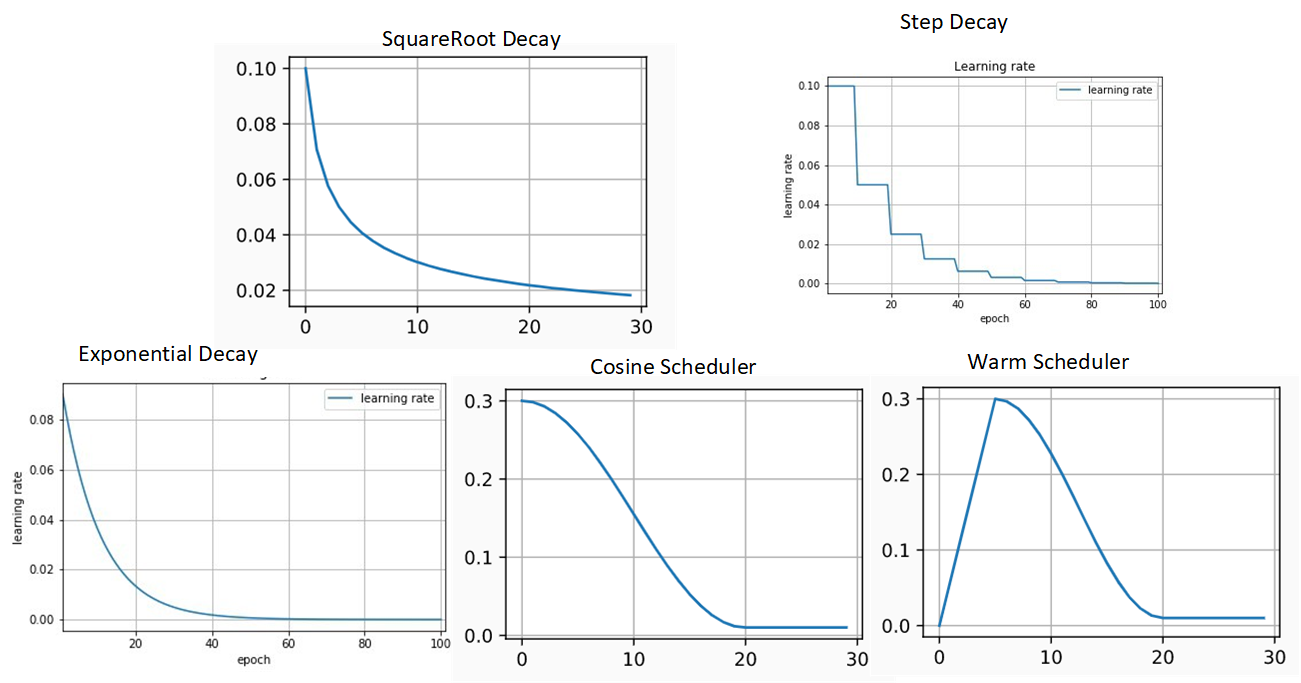

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'> 
    <em>Note</em><ul> 
    <li>In the theory the optimal $\eta$ value can be selected as $\eta \leq \frac{2}{M}$, where $M$ satisfy to the so-called Lipchitz condition:
$ \|\nabla L(W^t,X,y)-\nabla L(W^{t-1},X,y)\|\leq M\|W^{t}-W^{t-1}\|,$ but for that equation we need first to know $\nabla L(W^t,X,y)$ and this is a contradictional condition. Thus we can not use it in the practice.
  <li> Also in the theory it is proposed the Quickest Descent
      $$ \eta_t= \min_{\eta_{t}}\big\|W^{t-1}-\eta_{t} \|\nabla L(W^{t-1},X,y)\|\big\|,	 $$
however, it often do not allow one to obtain fast convergence.
 </ul>

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
<em>Note</em><ul>
    In the theory we can also consider the second order models, Like Newton, or Levenberg- Marquardt method, but on the practice they require to highly increase the computation complexity without guaranty to overcome problems or rare features or a noises in data. Thus, they does not applied. 
<blockquote>
   If you want to familiarize with the second order model, let's considering the Taylor series  with second order terms as:
$$err(W^t,X)\approx err(W^{t-1},X)+\nabla err^T (W^{t-1},X)(W^t-W^{t-1})+\frac{1}{2}(W^t-W^{t-1})^T H W^{t-1}(w^t-w^{t-1}),$$
where $H$ is the Hessian with the elements $H_{ij}=\frac{\partial^2}{\partial W_i \partial W_j}$
The value $W^t-W^{t-1}$ can be obtained as zeros of partial derivative by $w^t-w^{t-1}$.
$$\frac{\partial err}{\partial (W^t-W^{t-1} } = \nabla err^T W^{t-1} + (W^t-W^{t-1})^T H W^{t-1}$$
    The solution is so called <b>Newton method</b>:
$$W^t=W^{t-1}-H^{-1} L(W^{t-1},X,y)\nabla L(W^{t-1},X,y)^T,$$
	The main drawback of the Newton method is the high complexity of Hessian calculation.<br>
	The main advantage of the Newton method is absence of manual selection of $\eta$. 
	<ul>In the case of one parameter 
$$W^t=W^{t-1}-\frac{ L'(W^{t-1},X,y)}{L^{''}(W^{t-1},X,y) }$$
    <blockquote>    
Let’s considering the newton method for the $L_2$ loose function:
$$err=\sum_{i=1}^N (y-f(W,X))^2\to\min $$,
The Taylor series:
$$err(W^t,X)\approx err(W^{t-1},X)+G(W,X)(W^t-W^{t-1})+(W^t-W^{t-1})^T Q(W,X)(W^t-W^{t-1}),$$
where<ul>
<li> $G(W,X)=2J^T f(W,X)$, 
<li> $ Q(w,x)=(J^T J+\sum f(W,X) H f(W,X))$,
<li> $J$ is the Jacobian matrix,<ul>
 for a functions set $f_i = f(w,x_i )$:  $J=(\nabla f_1,...,\nabla f_N )^T$
	in the area near the minimum $err(W,X)$  the second order terms decreased faster enough for assumption that $J^T J \gg \sum f(W,X) H f(W,X)$. Thus the gradient can be given as<br>
    <b>The Newton-Gauss method</b>:
$$W^t=W^{t-1}-(J^T J)^{-1} J^T f(W,X)$$
	The method work only for square means loose function, but has less computational complexity than  simple 
Newton Method. However, the main problem here TIn practice the condition number of operator  $J^T J$ in square degree 	worse than for J operator, <ul>I.e. if $J=U^T DV$, then $JJ^T=VDU^T UDV^T=VD^2 V^T$.</ul>.
The solution is to using robust methods:<br>
    <b>The Levenberg- Marquardt method:</b>
$$W^t=W^{t-1}-(J^T J+\mu I)^{-1} J^T f(W,x)$$
	where $\mu$ is the regularization parameter, in case of $\mu\gg1$ the method convergence  rate like first order gradient
	 in case of $\mu\ll1$ the method convergence  rate like in the Newton-Gauss method. In some cases optimal $\mu$
	 can be choose as $\mu=diag (J^T J)$


#### Adaptive Gradient Descent Methods

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'> 
    Beside the learning scheduler the gradient descent can be improved using its modifications, or so-called<br>
    <b>Adaptive Gradient Descent Methods</b>:<ul>
<li> <b>Gradient with history (Heavy-ball method)</b> : The most simple idea is to regularize weights update using its history
        $$W^t=W^{t-1}-\eta_t g_{t-1}+\beta_t (W^{t-1}-W^{t-2}),$$
where $g_{t-1}=\nabla L(W^{t-1},X,y)$
<li> <b>Momentum Gradient:</b> (<b>Nesterov Gradient</b>,   impulse gradient)
	 $$W^t=W^{t-1}-\eta_t\nabla L(W^{t-1}+\beta_t (W^{t-1}-W^{t-2}),X,y)+\beta_t (W^{t-1}-W^{t-2}),$$
 where $\beta\sim0.9.$<br>
     <em>Note</em><ul>
     In some sources the Nesterov Moment Gradient can be rewritten in the equal form as
     $$
\begin{align} 
\begin{split} 
W^t &= \gamma W^{t-1} + \eta_t \nabla_\theta J( \theta - \gamma W^{t-1} ) \\ 
\theta &= \theta - W^t 
\end{split} 
\end{align}
     $$
    It is highly recommended to use Moment with SGD, especially for small mini batches.
     <!-- https://ruder.io/optimizing-gradient-descent/ -->
<!--  https://medium.datadriveninvestor.com/overview-of-different-optimizers-for-neural-networks-e0ed119440c3-->
<!--  https://medium.com/konvergen/momentum-method-and-nesterov-accelerated-gradient-487ba776c987-->

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'> <ul>
<li> <b>Adaptive Gradient (Adgrad):</b><ul>
    In the large network some of the features can be very informative, but appear rare in dataset,
    <br>If we assume that each output on each layer is a some feature selector, we can propose to
    accumulation it activations to regularize the frequency of its appearing such that weights for all features converge together:
    $$\begin{aligned}
    W^t=W^{t-1}-\frac{\eta_t}{\sqrt{G_t+\epsilon}}g_{t-1}, \quad
	G_t=G_{t-1}+[g_{t-1}]^2 
    \end{aligned}$$
Where  $G_t$ is the sum of squares of updating rate for each weight,
$g_{t-1}=\nabla L(W^{t-1},X,y)$.
<ul> Than bigger $G_t$ than smaller changing of  $W^{t-1}$</ul>
$\epsilon$ is the small value for guarantee absence of dividing on 0 error.
Sometimes the other variants can be used, for instance
 $G_t=G_{t-1}+\exp⁡[-g_{t-1}]$
In other words, the main idea is updating frequently activated feature weights with smaller step than for rare features for make all features even influencing on the results.
</ul>
<!-- https://ruder.io/optimizing-gradient-descent/ -->
<!--  https://medium.datadriveninvestor.com/overview-of-different-optimizers-for-neural-networks-e0ed119440c3-->
<!--  https://medium.com/konvergen/momentum-method-and-nesterov-accelerated-gradient-487ba776c987-->

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'> <ul>
<li> <b>RMSProp method:</b><ul>
	The main drawback of Adgrad method is absence of any finishing criterion for stop changing the learning rate. 
    Instead of accumulating all past squared gradients, RMSProp method restricts the window of accumulated past gradients to some size by exponential averaging (then higher averaging constant, then more width window). <br>
    RMSprop divides the learning rate by an exponentially decaying average of squared gradients. 
    $$
\begin{align} 
\begin{split} 
E[g^2_t] &= 0.9 E[g^2_{t-1}] + 0.1 g^2_t \\ 
W^{t} &= W^{t-1} - \dfrac{\eta_t}{\sqrt{E[g^2_t] + \epsilon}} g_{t} ,
\end{split} 
\end{align}
$$
 where $g_t =\nabla L(W^{t},X,y) $.<br> 
    In some case method can be parametrize as:
$$ E[g^2_t] = \gamma E[g^2_{t-1}] + (1-\gamma) g^2_t  $$,
However, $\gamma=0.9$ was originally proposed for $\eta_t=0.001$.
<!--     https://paperswithcode.com/method/rmsprop -->
    <!-- https://ruder.io/optimizing-gradient-descent/ -->
<!--  https://medium.datadriveninvestor.com/overview-of-different-optimizers-for-neural-networks-e0ed119440c3 -->
<!--  https://medium.com/konvergen/momentum-method-and-nesterov-accelerated-gradient-487ba776c987 -->
<blockquote>
<em>Note</em> 
<ul>
    Beside the RMSProp similar results can be obtained using Addelta method
	$$
    	\begin{align} 
        \begin{split} 
        \Delta W_t &= - \dfrac{RMS[\Delta W_{t-1}]}{RMS[g_{t}]} g_{t} \\ 
        W^{t+1} &= W^t + \Delta W_t. 
        \end{split} 
        \end{align}
    $$
 where:
 <ul>
    <li>$g_t =\nabla L(W^{t},X,y) $,
    <li>$E[g^2_t] = \gamma E[g^2_{t-1}] + (1 - \gamma) g^2_t,$
    <li>$E$ is statistical moment (expected maximization).
    <li>$\rm{RMS}[g_t]=\sqrt{E[g^2_t]+\epsilon}.$ 
    <li>$E[\Delta W^2_t] = \gamma E[\Delta W^2_{t-1}] + (1 - \gamma) \Delta W^2_t.$
    <li>$\rm{RMS}[\Delta W_{t}] = \sqrt{E[\Delta W^2_t] + \epsilon}.$
</ul><br>
  With Adadelta, we do not even need to set a default learning rate, as it has been eliminated from the update rule.<br>
  The RMS prop is sufficiently more popular then Addelta despite of it require learning rate.    <br>
<!-- https://ruder.io/optimizing-gradient-descent/ -->
<!--  https://medium.datadriveninvestor.com/overview-of-different-optimizers-for-neural-networks-e0ed119440c3-->
<!--  https://medium.com/konvergen/momentum-method-and-nesterov-accelerated-gradient-487ba776c987-->

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'> <ul>
 <li> <b>ADAM method (Adaptive Moment Estimation):</b><ul> 
     Adam is an adaptive learning rate optimization algorithm that utilises both momentum and scaling, combining the benefits of RMSProp and SGD with Momentum. The optimizer is designed to be appropriate for non-stationary objectives and problems with very noisy and/or sparse gradients.<br>
 Thus, the main idea is to use include moment in to derivation of RMSProp.    
$$
\begin{align} 
\begin{split} 
&W^{t} = W^{t-1} - \eta\frac{\hat{m}_{t}}{\sqrt{\hat{v}_{t}} + \epsilon} \\
&\text{with} \\
&m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t \\ 
&v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2 \\
&\hat{m}_t = \dfrac{m_t}{1 - \beta^t_1} \\ 
&\hat{v}_t = \dfrac{v_t}{1 - \beta^t_2} 
\end{split} 
\end{align}$$
Default values  $\beta_1 = 0.9$, $\beta_2 = 0.999$, $\epsilon=1e-8$.
     The method is the most popular optimizer for Deep Learning.
<!--  The methods allowing overcome some problems with Addelta and RMSProp, i.e. problem of uncontacceleration the most spread feature of stopping of gradient while waiting for the some particular feature. -->
<!--      https://paperswithcode.com/method/adam -->
<!-- https://ruder.io/optimizing-gradient-descent/ -->
     
<blockquote>
     <em>Notes</em><ul>
    The variations of ADMA are:<ul>
    <li> ADMax:
        $$ 
        \begin{align} 
\begin{split} 
        W^{t} = W_{t-1} - \dfrac{\eta_t}{u_t} \hat{m}_t \\
        u_t = \max(\beta_2 \cdot v_{t-1}, |g_t|) 
        \end{split} 
\end{align}
        $$
  with recommended $\eta = 0.002$
 <li> NADAM:
    $$ W^{t} = W_{t-1} - \dfrac{\eta}{\sqrt{\hat{v}_t} + \epsilon} (\beta_1 \hat{m}_t + \dfrac{(1 - \beta_1) g_t}{1 - \beta^t_1})$$
    

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'> <ul>
 <li> <b>AMSGrad method:</b><ul> 
     AMSGrad is a stochastic optimization method that seeks to fix a convergence issue with Adam based optimizers. AMSGrad uses the maximum of past squared gradients  rather than the exponential average to update the parameters:
$$     \begin{align} 
\begin{split} 
&W^{t} = W^{t-1} - \dfrac{\eta_t}{\sqrt{\hat{v}_t} + \epsilon} m_t \\
&\text{with}\\
&m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t \\ 
&v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2\\ 
\hat{v}_t &= \text{max}(\hat{v}_{t-1}, v_t) \\ 
\end{split} 
\end{align}$$
<!--      https://paperswithcode.com/method/adam -->
<!-- https://ruder.io/optimizing-gradient-descent/ -->